**Name** : Nikhil S. Mohite **Roll no **: 16304424014

**Topic** : Exploratory Data Analysis and Visualization of Bank Transaction Data

**Introduction** : This project focuses on performing Exploratory Data Analysis (EDA) and visualization on a dataset of bank transactions.These analyses can assist financial institutions in understanding customer spending habits, improving fraud detection, and tailoring banking services to customer needs.

Step 01 : #Import Libary

In [81]:
#Import Libary
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

Step 02 : Load the dataset

The dataset includes various attributes, such as transaction types, customer demographics, transaction amounts, and account balances

In [82]:
# Load the dataset
data = pd.read_csv('/content/bank_transactions_data_2.csv')

In [83]:
# Display the first few rows of the dataset
data.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [84]:
#Display the last few rows of the dataset
data.tail()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
2507,TX002508,AC00297,856.21,2023-04-26 17:09:36,Credit,Colorado Springs,D000625,21.157.41.17,M072,Branch,33,Doctor,109,1,12690.79,2024-11-04 08:11:29
2508,TX002509,AC00322,251.54,2023-03-22 17:36:48,Debit,Tucson,D000410,49.174.157.140,M029,Branch,48,Doctor,177,1,254.75,2024-11-04 08:11:42
2509,TX002510,AC00095,28.63,2023-08-21 17:08:50,Debit,San Diego,D000095,58.1.27.124,M087,Branch,56,Retired,146,1,3382.91,2024-11-04 08:08:39
2510,TX002511,AC00118,185.97,2023-02-24 16:24:46,Debit,Denver,D000634,21.190.11.223,M041,Online,23,Student,19,1,1776.91,2024-11-04 08:12:22
2511,TX002512,AC00009,243.08,2023-02-14 16:21:23,Credit,Jacksonville,D000215,59.127.135.25,M041,Online,24,Student,93,1,131.25,2024-11-04 08:07:49


In [67]:
data.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Step 03 : Data Preprocessing

Handling Missing Values: Check for and handle any missing values.

Data Discretization: Convert continuous variables into discrete intervals.

Data Normalization: Normalize numerical columns to scale the values.

Encoding Categorical Data: Convert categorical variables into numerical format if necessary.

In [68]:
# Check for missing values
print("Missing values in each column:\n", data.isnull().sum())

# Fill or drop missing values if any
# Select only numeric columns for calculating the mean
numeric_data = data.select_dtypes(include='number')
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Update the original DataFrame with the filled numeric columns
data[numeric_data.columns] = numeric_data


Missing values in each column:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [87]:
# Discretize 'TransactionAmount' into 3 bins
data['TransactionAmount_Category'] = pd.cut(data['TransactionAmount'], bins=3, labels=['Low', 'Medium', 'High'])


In [88]:
# Display the first few rows to check the new 'TransactionAmount_Category' column
print(data[['TransactionAmount', 'TransactionAmount_Category']].head())
# Display the first few rows to check the new 'TransactionAmount_Category' column
print(data[['TransactionAmount', 'TransactionAmount_Category']].tail())

   TransactionAmount TransactionAmount_Category
0              14.09                        Low
1             376.24                        Low
2             126.29                        Low
3             184.50                        Low
4              13.45                        Low
      TransactionAmount TransactionAmount_Category
2507             856.21                     Medium
2508             251.54                        Low
2509              28.63                        Low
2510             185.97                        Low
2511             243.08                        Low


In [89]:
# Normalize TransactionAmount and AccountBalance
scaler = MinMaxScaler()
data[['TransactionAmount', 'AccountBalance']] = scaler.fit_transform(data[['TransactionAmount', 'AccountBalance']])
# Display the first few rows to check normalized 'TransactionAmount' and 'AccountBalance'
print(data[['TransactionAmount', 'AccountBalance']].head())
print(data[['TransactionAmount', 'AccountBalance']].tail())

   TransactionAmount  AccountBalance
0           0.007207        0.336832
1           0.195940        0.918055
2           0.065680        0.068637
3           0.096016        0.569198
4           0.006874        0.492591
      TransactionAmount  AccountBalance
2507           0.446074        0.846257
2508           0.130953        0.010318
2509           0.014785        0.220590
2510           0.096782        0.112636
2511           0.126545        0.002017


In [90]:
# Encode TransactionType using one-hot encoding
# Check if 'TransactionType' exists in the columns
if 'TransactionType' in data.columns:
    data = pd.get_dummies(data, columns=['TransactionType'], drop_first=True)
else:
    print("Column 'TransactionType' not found in the DataFrame.")

# Display the first few rows to check the encoded 'TransactionType' columns
print(data.head())

  TransactionID AccountID  TransactionAmount      TransactionDate   Location  \
0      TX000001   AC00128           0.007207  2023-04-11 16:29:14  San Diego   
1      TX000002   AC00455           0.195940  2023-06-27 16:44:19    Houston   
2      TX000003   AC00019           0.065680  2023-07-10 18:16:08       Mesa   
3      TX000004   AC00070           0.096016  2023-05-05 16:32:11    Raleigh   
4      TX000005   AC00411           0.006874  2023-10-16 17:51:24    Atlanta   

  DeviceID      IP Address MerchantID Channel  CustomerAge CustomerOccupation  \
0  D000380  162.198.218.92       M015     ATM           70             Doctor   
1  D000051     13.149.61.4       M052     ATM           68             Doctor   
2  D000235  215.97.143.157       M009  Online           19            Student   
3  D000187  200.13.225.150       M002  Online           26            Student   
4  D000308    65.164.3.100       M091  Online           26            Student   

   TransactionDuration  LoginAtt

Step 4: Similarity Calculation
Calculate similarity between selected numerical attributes

1.Cosine Similarity for TransactionAmount and AccountBalance

2. Euclidean Distance for TransactionAmount and AccountBalance

3.Manhattan Distance for TransactionAmount and AccountBalance

In [91]:
# Calculate cosine similarity between TransactionAmount and AccountBalance
similarity = cosine_similarity(data[['TransactionAmount', 'AccountBalance']])
print("Cosine Similarity:\n", similarity)

Cosine Similarity:
 [[1.         0.98221506 0.73712571 ... 0.9989637  0.77223721 0.03732012]
 [0.98221506 1.         0.85089542 ... 0.98974287 0.87779298 0.22428495]
 [0.73712571 0.85089542 1.         ... 0.76711819 0.99856665 0.70279451]
 ...
 [0.9989637  0.98974287 0.76711819 ... 1.         0.80035357 0.08276377]
 [0.77223721 0.87779298 0.99856665 ... 0.80035357 1.         0.6637117 ]
 [0.03732012 0.22428495 0.70279451 ... 0.08276377 0.6637117  1.        ]]


In [92]:
from scipy.spatial.distance import euclidean

# Calculate Euclidean Distance for each pair in TransactionAmount and AccountBalance
euclidean_distances = [euclidean(data[['TransactionAmount']].iloc[i], data[['AccountBalance']].iloc[i])
                       for i in range(len(data))]
print("Sample Euclidean Distances (TransactionAmount vs AccountBalance):")
print(euclidean_distances[:5])  # Show the first 5 distances

Sample Euclidean Distances (TransactionAmount vs AccountBalance):
[0.3296244177107576, 0.722114350831284, 0.002957384749636874, 0.47318211318127806, 0.48571720990151174]


In [93]:
# Calculate Manhattan Distance for each pair in TransactionAmount and AccountBalance
manhattan_distances = [np.abs(data['TransactionAmount'].iloc[i] - data['AccountBalance'].iloc[i])
                       for i in range(len(data))]
print("Sample Manhattan Distances (TransactionAmount vs AccountBalance):")
print(manhattan_distances[:5])  # Show the first 5 distances

Sample Manhattan Distances (TransactionAmount vs AccountBalance):
[0.3296244177107576, 0.722114350831284, 0.002957384749636874, 0.47318211318127806, 0.48571720990151174]


Step 5: Data Visualization & Explanation of Charts


Histogram for Transaction Amount

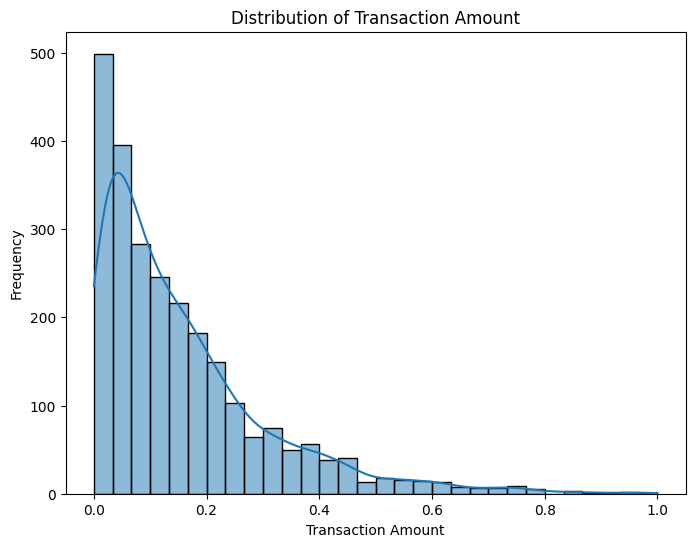

In [94]:
plt.figure(figsize=(8, 6))
sns.histplot(data['TransactionAmount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

2. line graph : Transaction Amount Over Time

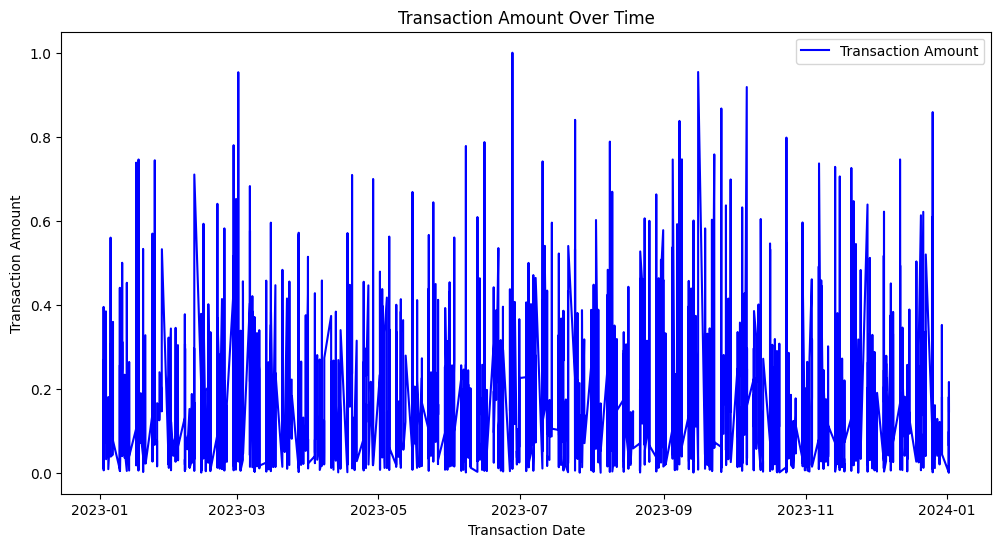

In [95]:
import matplotlib.pyplot as plt

# Convert 'TransactionDate' to datetime format if it's not already in that format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], errors='coerce')

# Sort the data by 'TransactionDate'
data = data.sort_values(by='TransactionDate')

# Plot Transaction Amount over time
plt.figure(figsize=(12, 6))
plt.plot(data['TransactionDate'], data['TransactionAmount'], color='b', label='Transaction Amount')
plt.xlabel('Transaction Date')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount Over Time')
plt.legend()
plt.show()

3. Bar Chart for Transaction Type Count:

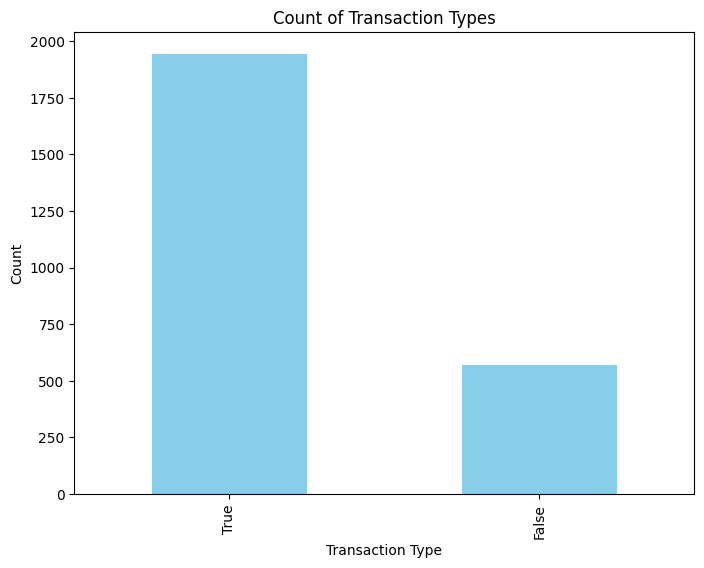

In [96]:
plt.figure(figsize=(8, 6))
data['TransactionType_Debit'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Count of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

4. Scatter Plot for Transaction Amount vs. Account Balance

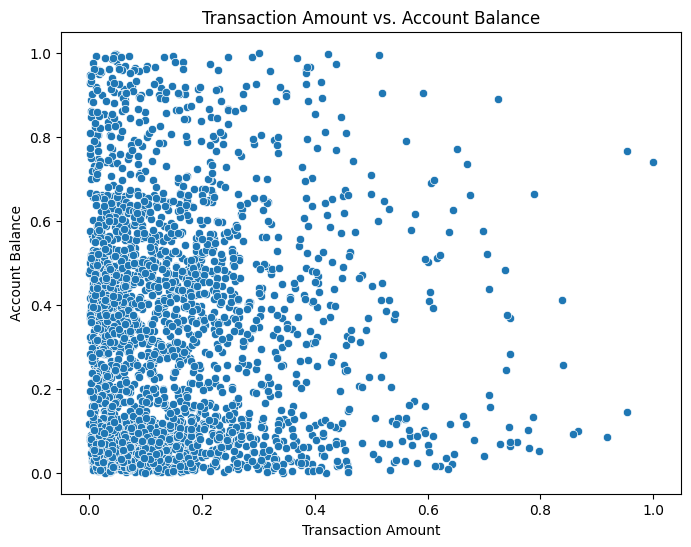

In [97]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TransactionAmount', y='AccountBalance', data=data)
plt.title('Transaction Amount vs. Account Balance')
plt.xlabel('Transaction Amount')
plt.ylabel('Account Balance')
plt.show()


5. 3D Scatter Plot - To visualize multi-dimensional data

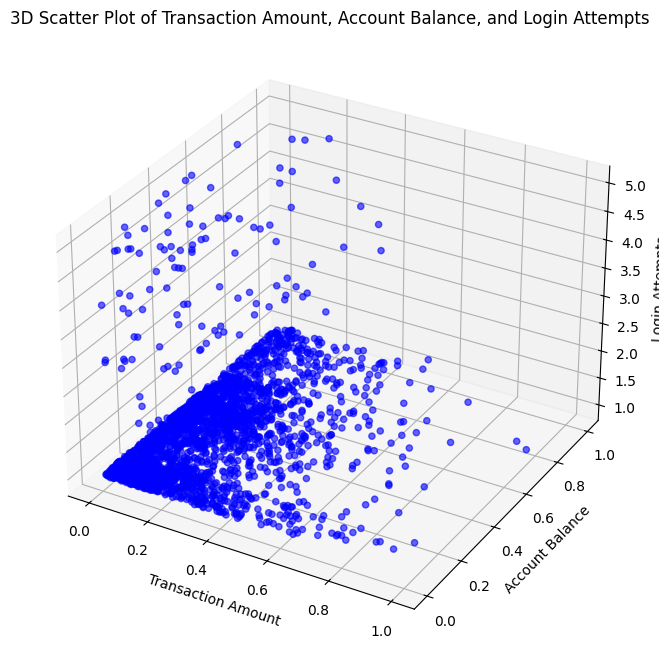

In [98]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['TransactionAmount'], data['AccountBalance'], data['LoginAttempts'], c='blue', alpha=0.6)
ax.set_xlabel('Transaction Amount')
ax.set_ylabel('Account Balance')
ax.set_zlabel('Login Attempts')
ax.set_title('3D Scatter Plot of Transaction Amount, Account Balance, and Login Attempts')
plt.show()

**Conclusion :** this mini project demonstrated how data preprocessing and visualization can provide a foundational understanding of a dataset, highlight areas for deeper investigation, and prepare the data for further modeling or machine learning tasks. These insights could be valuable for a financial institution or data analyst to identify patterns, detect anomalies, or design targeted strategies for customer engagement.